<a href="https://colab.research.google.com/github/StephenMa1511/Risk-Management/blob/main/Risk_Management_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libaries

In [ ]:
!pip install -q fredapi pgmpy myeia hmms networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.3 MB/s eta 0:00:00


In [ ]:
#!pip install -q fredapi pgmpy myeia networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.2 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [ ]:
!python setup.py build_ext --inplace

Compiling example.pyx because it changed.
[1/1] Cythonizing example.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/example.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'example' extension
creating build
creating build/temp.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c example.c -o build/temp.linux-x86_64-cpython-310/example.o
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                

In [ ]:
import numpy as np
import example

arr = np.array([1, 2, 3, 4], dtype=np.int32)
result = example.convert_np_int32_to_np_int_t(arr)
print(result)

[1 2 3 4]


In [ ]:
pip install --upgrade pip setuptools wheel

## Step 1 - Pseudocode of HMM Algorithms

### 1a: Forward and Backward Algorithm

We used the codes implemented from:
https://www.adeveloperdiary.com/data-science/machine-learning/forward-and-backward-algorithm-in-hidden-markov-model/

In [ ]:
import pandas as pd
import numpy as np
import hmms

Pseudo code:


```

Input: initial_state_probs, a, b, V
Where:
initial_state_probs: Initial state probabilities
a: State transition probabilities
b: Observation probability matrix
V: Sequence of observations

Output: state probabilities for the forward direction
 last_state_probs: si(t0) = pi_i * b(first emission)
for all observations: t:
  observation at t: k
  for all possible current states: j:
 	s_j(t) = b_kj * sum_i(a_ij*, s_i(t-1))
Update last_state_probs with the computed probabilities s_j(t) for the next iteration.
```



In [ ]:
# Forward Algorithm:
def forward(V, a, b, initial_distribution):
    # si(t0) = pi_i * b(emission)
   alpha = np.zeros((len(V), a.shape[0]))
   alpha[0, :] = initial_distribution * b[:, V[0]]

   for t in range(1, V.shape[0]):
       for j in range(a.shape[0]):
          # Pj(t) = bkj * sum_i(aij*P(si, t-1))
           alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

   return alpha

# Observations
V = np.array([0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1])

# Transition Probabilities
a = np.array(((0.55, 0.45), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.14, 0.26, 0.60), (0.25, 0.28, 0.47)))

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.5, 0.5))

forward(V, a, b, initial_distribution)

array([[7.00000000e-02, 1.25000000e-01],
       [2.59350000e-02, 2.66700000e-02],
       [1.63995300e-02, 1.18780515e-02],
       [8.90399204e-03, 6.31566954e-03],
       [1.11886232e-03, 1.80694697e-03],
       [3.90202356e-04, 3.99008679e-04],
       [2.46075329e-04, 1.78170179e-04],
       [3.11702746e-05, 5.04001723e-05],
       [1.08783312e-05, 1.11245992e-05],
       [1.60077901e-06, 2.64219866e-06],
       [5.65527508e-07, 5.79004124e-07]])

In [ ]:
# Backward Algorithm:
def backward(V, a, b):
    probs = np.zeros((V.shape[0], a.shape[0]))

    # setting beta(T) = 1
    probs[V.shape[0] - 1] = np.ones((a.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            probs[t, j] = (probs[t + 1] * b[:, V[t + 1]]).dot(a[j, :])

    return probs

# Observations
V = np.array([0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1])

# Transition Probabilities
a = np.array(((0.55, 0.45), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.14, 0.26, 0.60), (0.25, 0.28, 0.47)))

backward(V, a, b)

array([[5.85609848e-06, 5.87683790e-06],
       [2.19252032e-05, 2.15936065e-05],
       [4.06869635e-05, 4.01820578e-05],
       [7.41229275e-05, 7.67205554e-05],
       [3.90290844e-04, 3.91738067e-04],
       [1.45937180e-03, 1.44127521e-03],
       [2.65849375e-03, 2.75209865e-03],
       [1.39746929e-02, 1.40661546e-02],
       [5.11105000e-02, 5.29039000e-02],
       [2.69000000e-01, 2.70200000e-01],
       [1.00000000e+00, 1.00000000e+00]])

### 1b: Viterbi Algorithm

The Viterbi algorithm is an efficient way of finding the most probable hidden states for a given observation (Torres). It is a dynamic programming solution that maximizes $ P(Q|O) $ where $ Q $ is the set of states and $ O $ is the set of observations (Butler).

$$ P(Q | O) = P(O|Q) P(Q) = \Pi_{i=1}^{T} P(o_i|q_i) P(q_i | q_{i-1}) $$

It is possible to find the sequence of state that maximize $ P(Q|O) $ above using brute force (i.e. find all the possible sequence of states) but it would be expensive. Viterbi algorithm is an iterative process that can solve this problem efficiently (Butler).

To define the Viterbi algorithm, we will need to define several components for the algorithm

* Q is an array of size N, which is all the possible states
* O is an array of size T, which is the sequence of observations
* Pi is an array of size N, which is the starting probabilities of each state
* A is an N * N matrix, which is the transition probabilities of the states
* B is an N * T matrix, which is the emission matrix of the observation given state

The pseudocode below is adapted from Jurafsky and Martin.

```
Viterbi Algorithm

Input: Q, O, Pi, A, B
Output: sequence of most probable states

FUNCTION Viterbi:
  SET T = LENGTH(O)
  SET N = LENGTH(S)

  // V is matrix of probabilities
  INIT V as (N, T) matrix
  
  // path is a matrix of back pointers for backtracking
  INIT path as (N, T) matrix

  // this is the end result
  INIT best_path as array of size T

  // init V as pi * B
  FOR EACH s_i IN Q DO
    SET V[i][0] = Pi[i] * B[i][O[0]]
  END FOR

  FOR t in RANGE(1, T-1) DO
    FOR EACH j in IDX(Q) DO
       SET max_prob = -1
       SET best_state = 0
       FOR EACH i in IDX(Q) DO
         SET prob = V[i][t-1] * A[i][j] * B[j][O[t]]
         IF prob > max_prob THEN
           SET max_prob = prob
           SET best_state = i
         END IF
       END FOR
      SET V[j][t] = max_prob
      SET path[j][t] = best_state
    END FOR
  END FOR

  // Set last step
  SET best_path[T-1] = ARGMAX(v[:][T-1])

  // Backtrack to construct our best path
  FOR t RANGE(T-2, 0, -1) DO
    SET best_path[t] = path[best_path[t+1]][t+1]
  END FOR

  RETURN best_path
```

In [ ]:
# Backward Viterbi Algorithm:
def viterbi(V, a, b, initial_distribution):
    T = V.shape[0]
    M = a.shape[0]

    omega = np.zeros((T, M))
    omega[0, :] = np.log(initial_distribution * b[:, V[0]])

    prev = np.zeros((T - 1, M))

    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(a[:, j]) + np.log(b[j, V[t]])

            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)

            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)

    # Path Array
    S = np.zeros(T)

    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])

    S[0] = last_state

    backtrack_index = 1
    for i in range(T - 2, -1, -1):
        S[backtrack_index] = prev[i, np.int64(last_state)]
        last_state = prev[i, np.int64(last_state)]
        backtrack_index += 1

    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)

    # Convert numeric values to actual hidden states
    result = []
    for s in S:
        if s == 0:
            result.append("A")
        else:
            result.append("B")

    return result

# Observations
V = np.array([0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2])

# Transition Probabilities
a = np.array(((0.54, 0.46), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.16, 0.26, 0.58), (0.25, 0.28, 0.47)))

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.5, 0.5))

viterbi(V, a, b, initial_distribution)

['B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A']

### Toy Example

Consider a toy example where Alex will take action depending on the current weather

We have 2 weather states

$$ Q = [Raining, Sunny] $$

and we have 3 possible observations for Alex, *Exercise*, *Sleep* and *Wash*. The emission probabilities are given below

$$
B = \begin{bmatrix}
  P(\text{Exercise} \mid \text{Raining}) & P(\text{Sleep} \mid \text{Raining}) & P(\text{Wash} \mid \text{Raining}) \\
  P(\text{Exercise} \mid \text{Sunny}) & P(\text{Sleep} \mid \text{Sunny}) & P(\text{Wash} \mid \text{Sunny})
\end{bmatrix} = \begin{bmatrix}
  0.1 & 0.8 & 0.1 \\
  0.7 & 0.1 & 0.2
\end{bmatrix}
$$

The transition matrix is

$$
A = \begin{bmatrix}
  P(\text{Raining} \to \text{Raining}) & P(\text{Raining} \to \text{Sunny}) \\
  P(\text{Sunny} \to \text{Raining}) & P(\text{Sunny} \to \text{Sunny})
\end{bmatrix} = \begin{bmatrix}
  0.7 & 0.3 \\
  0.4 & 0.6
\end{bmatrix}
$$

**We observe that on a particular 2 days sequence, Alex is Exercising on the first day and Sleeping on the second day. What is the most likely sequence of states?**

Since we have no clue about the initial probability, we will assume a uniform distribution for the starting probabilities $ Pi $

$$
Pi = [P(Raining)=0.5, P(Sunny)=0.5]
$$

we initialize our first matrix of probabilities, $ V $

$$
V_0[Raining] = Pi[Raining] * B[Exercise \mid Raining] = 0.5 * 0.1 = 0.05
\\
V_0[Sunny] = Pi[Sunny] * B[Exercise \mid Sunny] = 0.5 * 0.7 = 0.35
$$

then we continue to t=1, where we observe that Alex is Sleeping

$$
V_1[Raining] = max(V_0[Raining] * A[Raining \to Raining] * B[Sleep \mid Raining], V_0[Sunny] * A[Sunny \to Raining] * B[Sleep \mid Raining]) = max(0.05 * 0.7 * 0.8, 0.35 * 0.4 * 0.8) = 0.112
\\
V_1[Sunny] = max(V_0[Raining] * A[Raining \to Sunny] * B[Sleep \mid Sunny], V_0[Sunny] * A[Sunny \to Sunny] * B[Sleep \mid Sunny]) = max(0.05 * 0.3 * 0.1, 0.35 * 0.6 * 0.1) = 0.021
\\
path_1[Raining] = argmax(V_1[Raining]) = Sunny
\\
path_1[Sunny] = argmax(V_1[Sunny]) = Sunny
$$

then we decide what's the most probable last state is

$$
last = argmax[V_1] = max(0.112, 0.021) = Raining
$$

we backtrack to get our sequence of states

$$
best\_path[1] = Raining
\\
best\_path[0] = path_1[Raining] = Sunny
$$

Therefore the most probable state of sequence is $ [ Sunny, Raining ] $

### 1.C- Baum-Welch algorithm

#### Pseudo Code



```
Algorithm Baum-Welch
Input:
    V: Sequence of observations
    a: State transition probabilities matrix
    b: Emission probabilities matrix
    initial_distribution: Initial state probabilities vector
    n_iter: Number of iterations (default = 100)

Output:
    Updated state transition probabilities matrix (a)
    Updated emission probabilities matrix (b)

Begin
    M <- Number of states
    T <- Length of observation sequence V

    Repeat for n_iter times:
        1. Calculate forward probabilities (alpha):
            alpha <- Forward algorithm using V, a, b, initial_distribution
        
        2. Calculate backward probabilities (beta):
            beta <- Backward algorithm using V, a, b
        
        3. Initialize xi matrix to store probabilities:
            xi <- Zero matrix of size (M, M, T - 1)
        
        4. Calculate xi for each time step t from 0 to T-2:
            For each state pair (i, j):
                Compute denominator:
                    denominator <- Sum of (alpha[t, i] * a[i, j] * b[j, V[t + 1]] * beta[t + 1, j]) for all states i and j
                
                Compute numerator for each state pair (i, j):
                    numerator <- alpha[t, i] * a[i, j] * b[j, V[t + 1]] * beta[t + 1, j]
                
                Calculate xi:
                    xi[i, j, t] <- numerator / denominator
        
        5. Calculate gamma by summing xi over the states:
            gamma <- Sum of xi over the second axis (axis=1)
        
        6. Update state transition probabilities (a):
            a <- Sum of xi over time (axis=2) divided by sum of gamma over time (axis=1), reshaped to (M, 1)
        
        7. Extend gamma to include the last time step:
            gamma <- Concatenate gamma with the sum of xi over the last time step (T-2), reshaped to (M, 1)
        
        8. Update emission probabilities (b):
            K <- Number of different observation symbols
            For each observation symbol l:
                Calculate sum of gamma where observation is l
                Update b[:, l] <- Sum of gamma where V equals l over all time steps
            
            Normalize b:
                denominator <- Sum of gamma over time (axis=1)
                b <- b divided by denominator reshaped to (M, 1)

    Return updated a and b
End

```



In [ ]:
#Baum-Welch algorithm:
def baum_welch(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)

    for n in range(n_iter):
        alpha = forward(V, a, b, initial_distribution)
        beta = backward(V, a, b)

        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))

        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V == l], axis=1)

        b = np.divide(b, denominator.reshape((-1, 1)))

    return (a, b)

# Observations
V = np.array([0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1])

# Transition Probabilities
a = np.array(((0.55, 0.45), (0.49, 0.51)))

# Emission Probabilities
b = np.array(((0.14, 0.26, 0.60), (0.25, 0.28, 0.47)))

# Equal Probabilities for the initial distribution
initial_distribution = np.array((0.5, 0.5))

a, b = baum_welch(V, a, b, initial_distribution, n_iter=100)

print(f'a: \n{a}\n\nb: \n{b}')

a: 
[[2.48950652e-01 7.51049348e-01]
 [1.00000000e+00 3.33317921e-29]]

b: 
[[1.49859951e-54 6.51489651e-01 3.48510349e-01]
 [8.23007198e-01 0.00000000e+00 1.76992802e-01]]


## DATA DOWNLOAD AND HMM TESTING:

In [ ]:
import fredapi
from fredapi import Fred
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from myeia.api import API


# Importing the library
# the API key we recieved from EIA
eia_key = "bCmoeBh5J0DVQ36NFo4ckz8TX25rOrqvBpJYk93G";
# Initiates a session with the EIA datacenter to recieve datasets
eia_api = API(eia_key);

# FRED API key
fred_key = "fd269c89c2141092cee85c0440f5333e";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);

In [ ]:
# Cleaning functions:
import datetime # Using the datetime library
def convert_to_datetime(input):
  return datetime.datetime.strptime(input[:9], "%Y %m ").date();

def clean_EIA(data):
  data.replace('-', np.nan, regex=True, inplace=True);
  data.fillna(method='bfill', inplace=True);
  # data.index = data.index.map(convert_to_datetime);
  # data.index = pd.to_datetime(data.index);
  return data

In [ ]:
datasets_eia = [
# 'STEO.RGDPQ_NONOECD.M',
# 'STEO.RGDPQ_OECD.M',
'STEO.PAPR_NONOPEC.M',
'STEO.PAPR_OPEC.M',
'STEO.PATC_OECD.M',
'STEO.PATC_NON_OECD.M',
'STEO.COPRPUS.M',
'STEO.CORIPUS.M',
'PET.MCRIMXX2.M',
# 'STEO.FOREX_WORLD.M',
'STEO.PASC_OECD_T3.M',
'STEO.COPS_OPEC.M',
'STEO.COPC_OPEC.M',
'STEO.T3_STCHANGE_OOECD.M',
'STEO.T3_STCHANGE_NOECD.M',
];

datasets_fred = [
'CPIENGSL',
'CAPG211S',
'CAPUTLG211S',
'IPG211S',
'IPG211111CN',
'INDPRO',
'IPN213111N',
'PCU211211',
];

data_merge = []
for series_id in datasets_eia:
  df = pd.DataFrame(eia_api.get_series(series_id=series_id));
  clean_EIA(df);
  df.columns = [series_id];
  data_merge.append(df);

# Adding FRED datasets
for series_id in datasets_fred:
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  data_merge.append(df);

In [ ]:
# Oil Prices Download:
datasets = datasets_eia + datasets_fred + ['WTISPLC', 'forecast'];
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1),
columns=['forecast']);
data_merge.append(current);
data_merge.append(forecast);

data = pd.concat(data_merge, axis=1, join='inner');

In [ ]:
data.head()

,STEO.PAPR_NONOPEC.M,STEO.PAPR_OPEC.M,STEO.PATC_OECD.M,STEO.PATC_NON_OECD.M,STEO.COPRPUS.M,STEO.CORIPUS.M,PET.MCRIMXX2.M,STEO.PASC_OECD_T3.M,STEO.COPS_OPEC.M,STEO.COPC_OPEC.M,...,CPIENGSL,CAPG211S,CAPUTLG211S,IPG211S,IPG211111CN,INDPRO,IPN213111N,PCU211211,WTISPLC,forecast
2021-04-01,64.841425,29.160386,43.210972,52.693126,11.317989,15.162167,848,2911.576995,6.425,30.31,...,228.914,131.0718,94.3454,123.6602,165.4243,98.3317,85.6164,153.0,61.72,65.17
2021-03-01,64.768107,29.060352,43.506354,52.339988,11.351135,14.387129,704,2915.549210,6.425,30.32,...,228.547,131.3459,93.1234,122.3138,165.8403,98.1929,81.6001,164.0,62.33,61.72
2021-02-01,61.576654,28.933585,41.886653,52.524810,9.915936,12.370929,634,2968.122920,6.435,30.22,...,218.972,131.6582,81.8653,107.7823,150.8145,95.5072,80.7230,189.1,59.04,62.33
2021-01-01,64.471880,29.407937,41.774887,51.218377,11.137354,14.541839,510,3037.143340,5.525,29.73,...,209.996,132.0004,92.2854,121.8171,169.2416,98.8135,75.6223,140.8,52.00,59.04
2020-12-01,63.831982,29.248533,43.156876,50.983447,11.171507,14.139806,336,3027.590711,5.835,29.99,...,205.228,132.3654,90.8968,120.3160,169.6635,98.2039,68.7129,129.3,47.02,52.00


In [ ]:
# Data split:
train_data = data[: int(data.shape[0] * 0.80)];
vald_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];

In [ ]:
# Discretize dataset:
price = train_data['WTISPLC'];

# The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:];
# Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);

## FORECASTING:

In [ ]:
#Model defining:
dhmm_r = hmms.DtHMM.random(3 , 2);
e_seq = np.array_split(e_seq, 32);

In [ ]:
hmms.DtHMM.random?

In [ ]:
#HMM Model Training:
dhmm_r.baum_welch(e_seq, 200);
hmms.print_parameters( dhmm_r );

iteration  1 / 200
iteration  2 / 200
iteration  3 / 200
iteration  4 / 200
iteration  5 / 200
iteration  6 / 200
iteration  7 / 200
iteration  8 / 200
iteration  9 / 200
iteration  10 / 200
iteration  11 / 200
iteration  12 / 200
iteration  13 / 200
iteration  14 / 200
iteration  15 / 200
iteration  16 / 200
iteration  17 / 200
iteration  18 / 200
iteration  19 / 200
iteration  20 / 200
iteration  21 / 200
iteration  22 / 200
iteration  23 / 200
iteration  24 / 200
iteration  25 / 200
iteration  26 / 200
iteration  27 / 200
iteration  28 / 200
iteration  29 / 200
iteration  30 / 200
iteration  31 / 200
iteration  32 / 200
iteration  33 / 200
iteration  34 / 200
iteration  35 / 200
iteration  36 / 200
iteration  37 / 200
iteration  38 / 200
iteration  39 / 200
iteration  40 / 200
iteration  41 / 200
iteration  42 / 200
iteration  43 / 200
iteration  44 / 200
iteration  45 / 200
iteration  46 / 200
iteration  47 / 200
iteration  48 / 200
iteration  49 / 200
iteration  50 / 200
iteration

,0
0,0.148634
1,0.670923
2,0.180443


Transition probabilities matrix (A):


,0,1,2
0,1.230549e-09,0.699894,3.001056e-01
1,8.061564e-01,0.193844,5.732084e-13
2,7.247600e-04,0.357899,6.413760e-01


Emission probabilities matrix (B):


,0,1
0,9.999996e-01,4.152419e-07
1,6.430636e-01,3.569364e-01
2,1.266350e-10,1.000000e+00


In [ ]:
hmms.print_parameters( dhmm_r )

Initial probabilities (π) :


,0
0,0.148634
1,0.670923
2,0.180443


Transition probabilities matrix (A):


,0,1,2
0,1.230549e-09,0.699894,3.001056e-01
1,8.061564e-01,0.193844,5.732084e-13
2,7.247600e-04,0.357899,6.413760e-01


Emission probabilities matrix (B):


,0,1
0,9.999996e-01,4.152419e-07
1,6.430636e-01,3.569364e-01
2,1.266350e-10,1.000000e+00



## STEP 2: HMM MODEL RUNNING ON THE DATA:

The design process begins with preparing the data for regime identification, which involves the following main key steps:

1. Firstly, we need to conduct macroeconomic research to identify factors impacting oil prices.
2. Secondly, a process of identifying specific indicators that describe these macroeconomic factors is designed to be implemented.
3. Then, we retrieve the datasets for these indicators over the required timespan and frequency.
4. Finally, we implement data cleaning and preparing for the regime identification model.

#### Macroeconomic Research
Most changes in oil prices are attributable to a range of indicators such as global events, monetary policy, geopolitics, supply-demand dynamics, natural disasters, and activities of global oil and gas companies. Technically, these indicators can be categorized into the following factors:

1. Supply: OPEC significantly influences oil prices by adjusting their production levels, thus controlling the prices. However, in recent decades, the influence of OPEC has diminished with the emergence of non-OPEC players like the U.S. with the WTI oil.
2. Demand: Demand is another major factor affecting oil prices. Developed countries, such as OECD countries, consume the most oil production. Their consumption tends to be less volatile and has shown a slow decline over the past decades. Meanwhile, non-OECD countries have highly volatile and rapidly increasing oil consumption. Other crucial factors include transportation (both commercial and personal) and seasonal variations, with higher demand for transportation in summer and for heating in winter.
3. Politics: Political factors, both direct (such as OPEC decisions) and indirect (such as support for alternative industries like electric vehicles), can impact oil prices. Geopolitical events like wars, embargos, or revolutions in the Middle East also lead to increased oil prices.
4. Speculators: Despite oil being a physically deliverable commodity, many market participants engage in speculative trading of futures or options without intending to take physical possession. These speculators can also influence oil prices.

#### Indicator Identification
Based on the identified macroeconomic factors, several indicators can be defined that impact oil prices. The main sources for these indicators include the Energy Information Administration (EIA), the Federal Reserve Economic Data (FRED), and Yahoo Finance. Key indicators include:
1. Oil barrel spot price (FRED.WTISPLC)
2. GDP of OECD and non-OECD countries (STEO.RGDPQ_NONOECD.M, STEO.RGDPQ_OECD.M)
3. Forecasts for future crude oil factors, supply, and demand from EIA’s Short-Term Energy Outlook.
4. Oil production and consumption data from EIA (STEO.PAPR_NONOPEC.M, STEO.PAPR_OPEC.M, STEO.COPR_OPEC.M)
5. Dollar index (STEO.FOREX_WORLD.M)
6. Oil reserves (STEO.COPS_OPEC.M, STEO.COPC_OPEC.M)
7. Energy consumer price index (FRED.CPIENGSL)
8. Oil and gas extraction data (FRED.CAPG211S, FRED.CAPUTLG211S)

#### Retrieving Datasets
The datasets can be downloaded using Python packages such as fredapi (FRED), myeia (EIA), and yfinance (Yahoo Finance API).

#### Data Cleaning Process
To ensure compatibility for merging, the datasets are standardized to the same date format. Since all data are in monthly frequency, frequency adjustment is unnecessary. However, any missing data must be imputed by using appropriate methods, such as K-Nearest Neighbors (KNN) imputation.


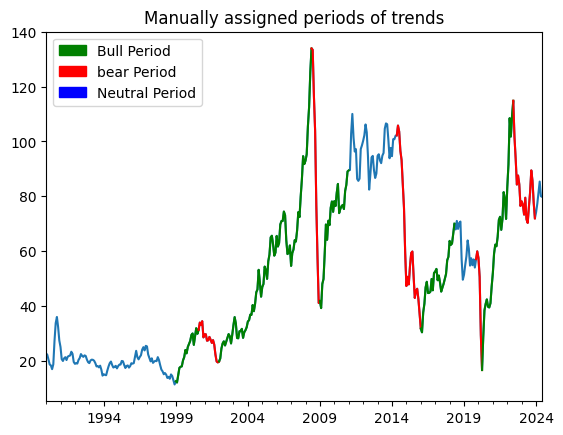

In [ ]:
# Retrieve data from FRED API
fred_financial_data = pd.DataFrame({'WTISPLC': fred.get_series('WTISPLC')})['1990-01-01':]
ax = fred_financial_data.plot()

# plt.axvline(x = '1999-01-01', color = 'b', label = 'axvline - full height')
fred_financial_data['1999-01-01':'2000-08-01'].plot(ax=ax, color='g')
# plt.axvline(x = '2000-08-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2000-08-01':'2002-01-01'].plot(ax=ax, color='r')
# plt.axvline(x = '2002-01-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2002-01-01':'2008-06-01'].plot(ax=ax, color='g')
# plt.axvline(x = '2008-06-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2008-06-01':'2009-01-01'].plot(ax=ax, color='r')
# plt.axvline(x = '2009-01-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2009-01-01':'2011-01-01'].plot(ax=ax, color='g')
# plt.axvline(x = '2011-01-01', color = 'b', label = 'axvline - full height')
# plt.axvline(x = '2014-05-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2014-05-01':'2016-01-01'].plot(ax=ax, color='r')
# plt.axvline(x = '2016-01-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2016-01-01':'2018-05-01'].plot(ax=ax, color='g')
# plt.axvline(x = '2018-05-01', color = 'b', label = 'axvline - full height')
# plt.axvline(x = '2019-11-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2019-11-01':'2020-04-01'].plot(ax=ax, color='r')
# plt.axvline(x = '2020-04-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2020-04-01':'2022-06-01'].plot(ax=ax, color='g')
# plt.axvline(x = '2022-04-01', color = 'b', label = 'axvline - full height')
fred_financial_data['2022-06-01':'2023-12-01'].plot(ax=ax, color='r')
# plt.axvline(x = '2022-12-01', color = 'b', label = 'axvline - full height')

# ax.get_legend().remove()

ax.set_title('Manually assigned periods of trends')
green_patch = mpatches.Patch(color='green', label='Bull Period')
red_patch = mpatches.Patch(color='red', label='bear Period')
blue_patch = mpatches.Patch(color='blue', label='Neutral Period')

ax.legend(handles=[green_patch, red_patch, blue_patch])

#### Between 1990 and 2024, I manually labelled the trends as follows:
Bull Market: When the market shows optimism, rising prices, and positive investor sentiment. Investors are confident and expect asset prices to keep increasing.

Bear Market: The periods are characterized by pessimism, falling prices, and negative investor sentiment. Investors are cautious and may even panic, expecting further declines in asset prices.

Stationary or Neutral Regime: When the period shows there is no clear upward or downward trend.


### FIND REGIMS WITH THE TRAINED HMM:

In [ ]:
# Data transform:
price = fred_financial_data['WTISPLC'];

# The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:];

# Replacing the change with 1 if positive, else 0
val_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);

val_seq = np.array_split(val_seq, 64);

In [ ]:
# Problem of matching between hmms library and newly updated numpy
dhmm_r.viterbi(np.concatenate(e_seq).ravel())

<ipython-input-20-e74d0a41026c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dhmm_r.viterbi(np.concatenate(e_seq).ravel())


(-129.15694908056452,
 array([1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0,
        2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2,
        1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1,
        0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1,
        0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
        1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1]))

In [ ]:
e_seq1 = np.asarray(np.concatenate(e_seq).ravel(), dtype=np.int32)
e_seq1 = e_seq1.astype(np.int_)

In [ ]:
dhmm_r.viterbi(e_seq1)

<ipython-input-22-53d68cba51b6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dhmm_r.viterbi(e_seq1)


(-129.15694908056452,
 array([1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0,
        2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2,
        1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1,
        0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1,
        0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
        1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1]))

In [ ]:
!pip install arch

In [ ]:
# prompt: provide an example of applying AR(1)-GJR-GARCH (1, 1) to an random generated time series

import numpy as np
import pandas as pd
from arch import arch_model

# Generate a random time series
np.random.seed(42)
returns = np.random.normal(0, 0.01, 1000)

# Fit an AR(1)-GJR-GARCH(1, 1) model
model = arch_model(returns, p=1, o=1, q=1, vol='GARCH')
results = model.fit()

# Print the model summary
print(results.summary())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate an AR(1)-GJR-GARCH(1,1) process
n = 1000  # Length of the time series
mu = 0.05  # Mean of the series
phi = 0.8  # AR(1) coefficient

# Parameters for GJR-GARCH(1,1)
alpha_0 = 0.1
alpha_1 = 0.1
gamma_1 = 0.1
beta_1 = 0.8

# Initialize arrays
y = np.zeros(n)
epsilon = np.zeros(n)
sigma2 = np.zeros(n)

# Generate the process
z = np.random.normal(0, 1, n)
for t in range(1, n):
    # Conditional variance equation
    sigma2[t] = (alpha_0 + alpha_1 * epsilon[t-1]**2 + gamma_1 * epsilon[t-1]**2 * (epsilon[t-1] < 0) + beta_1 * sigma2[t-1])
    sigma_t = np.sqrt(sigma2[t])
    # Innovation
    epsilon[t] = sigma_t * z[t]
    # AR(1) process
    y[t] = mu + phi * y[t-1] + epsilon[t]

# Convert to pandas Series
y_series = pd.Series(y)

# Step 2: Fit the AR(1)-GJR-GARCH(1,1) model
# Define the model
model = arch_model(y_series, mean='AR', lags=1, vol='GARCH', p=1, o=1, q=1, dist='normal')

# Fit the model
model_fit = model.fit()

# Step 3: Print the summary of the model fit
print(model_fit.summary())

# Plot the original series and conditional volatility
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(y_series)
ax[0].set_title('Generated Time Series')
ax[1].plot(model_fit.conditional_volatility)
ax[1].set_title('Conditional Volatility from AR(1)-GJR-GARCH(1,1) Model')
plt.tight_layout()
plt.show()

In [ ]:
arch_model?

In [ ]:
# Prediction:
( log_prob, s_seq ) = dhmm_r.viterbi(np.concatenate(val_seq).ravel())

# Add price
price_plot = pd.DataFrame(price[1:], index=price[1:].index);
# Add a column representing the regime
price_plot['Regime'] = s_seq;
# Add a column representing the increase or decrease in price
price_plot['diff'] = price_diff;

<ipython-input-24-f1a581bbab84>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ( log_prob, s_seq ) = dhmm_r.viterbi(np.concatenate(val_seq).ravel())


In [ ]:
# Connecting to bull bear or stagnating regimes:
# Get means of all assigned states
means = price_plot.groupby(['Regime'])['diff'].mean();
lst_1 = means.index.tolist();
lst_2 = means.sort_values().index.tolist();
map_regimes = dict(zip(lst_2, lst_1));
price_plot['Regime'] = price_plot['Regime'].map(map_regimes);

#### Regimes from the HMM:

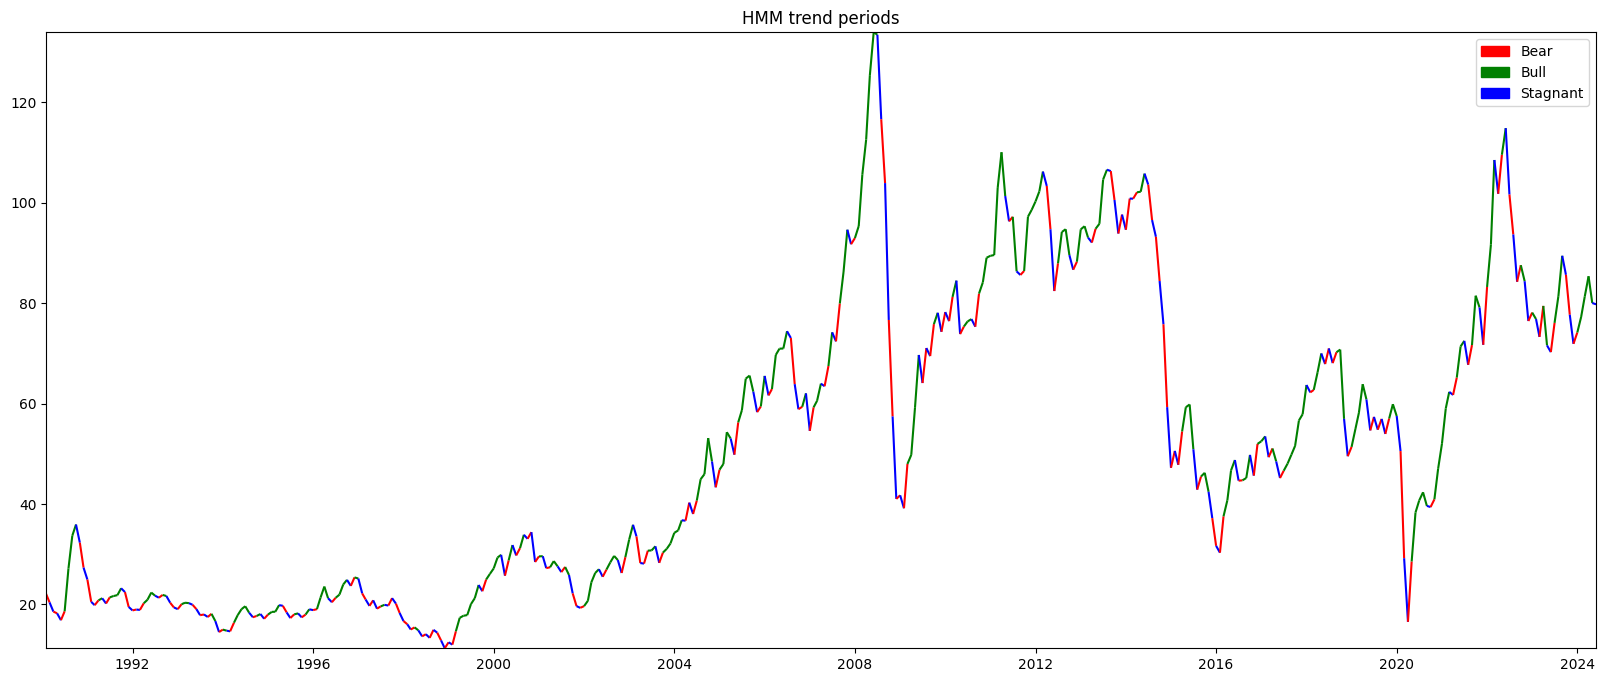

In [ ]:
# Draw the regimes made by the trained HMM
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm
fig, ax1 = plt.subplots(figsize=(20,8));
ax.plot(price_plot['WTISPLC']);
# Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green
cmap = ListedColormap(['r','b','g'],'indexed');
norm = BoundaryNorm(range(3 + 1), cmap.N);
inxval = mdates.date2num(price_plot['WTISPLC'].index.to_pydatetime());
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2);
segments = np.concatenate([points[:-1], points[1:]], axis=1);
lc = LineCollection(segments, cmap=cmap, norm=norm);
lc.set_array(price_plot['Regime']);
plt.gca().add_collection(lc);
plt.xlim(price_plot['WTISPLC'].index.min(), price_plot['WTISPLC'].index.max());
plt.ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max());
r_patch = mpatches.Patch(color='red', label='Bear');
g_patch = mpatches.Patch(color='green', label='Bull');
b_patch = mpatches.Patch(color='blue', label='Stagnant');
plt.legend(handles=[r_patch, g_patch, b_patch]);
plt.title('HMM trend periods')
plt.show();

## Step 3 - Hidden Markov Model

To define Hidden Markov Model, we first need to define Markov Process which is also known as Markov Chain

### Definition 1: Markov Process

A Markov Process is a stochastic process possessing the Markov property

$$
P(X_{k+1} \in A \mid X_0, ..., X_k) = P(X_{k+1} \in A \mid X_k) \ \ \forall A,k
$$

that is, future evolution of the process depends only on its present state (van Handel)

### Definition 2: Hidden Markov Model

A hidden Markov Model is a statistical model that represent a system that transitions between a finite number of hidden states (Jurafsky and Martin). A hidden Markov Model can be thought of a Markov process that is split into two components, an observable component and an unobservable (hidden) component (van Handel).

According to Degirmenci, given a finite set of (hidden) states, **Q**

$$
Q = [q_1, ..., q_n]
$$

a transition probability matrix **A**, where each $ a_{ij} $ repesent the probability of moving from state i to state j such that

$$
\sum_{j=1}^N a_{ij} = 1 \ \ \forall i
$$

a sequence of observation likelihoods (emission probabilities), **B** where each item expressing the probability of an observation $ o_t $ being generated from a state $ q_i $

$$
B = b_i(o_t)
$$

and an initial probability distribution over states $ \pi $, where $ \pi_i $ is the probability that the chain will start in state i.

$$
\pi = [\pi_1, ..., \pi_N]
$$

the hidden Markov Model system can be denoted by

$$
\lambda = (A, B, \pi)
$$

**Formal Definition** (van Handel)

Let $ X_n $ and $ Y_n $ denote stochastic processes. The pair $ (X_k, Y_k) $ on the product state space $(E \times F, \varepsilon \otimes \mathfrak{f})$  is a hidden Markov Model if there exists transition kernels $ P: E \times \varepsilon \to [0,1] $ and $ \phi: E \times \mathfrak{f} \to [0, 1] $ such that

$$
E(g(X_{k+1}, Y_{k+1} \mid X_0, Y_0, ... X_k, Y_k) = \int g(x,y) \ \phi(x, dy) \ P(X_k, dx)
$$

and a probability measure $\mu$ on E such that

$$
E(g(X_0, Y_0)) = \int g(x,y) \ \phi(x, dy) \ \mu(dx)
$$

where $g: E \times F \to \mathbb{R} $ , $ \mu $ is the initial measure, P is the transition kernel and $ \phi $ is the observation kernel.

## Step 4

### 4a - Macro research, indicator identification, dataset retrieval, and data cleaning process.

The dataset consist of 25 time series in monthly frequency in total.There are  15 variables retrievd from EIA and 8 accquired from Fred capturing the overall marcoeconomic and industrial enviroment like import, export, rig counts, reserve, etc... The other 2 variable left is the monthly WTI oil price and the 1 month ahead WTI price used as target for precition.



```
# Dataset series ID from the EIA

datasets_eia  = [

                        'STEO.RGDPQ_NONOECD.M',
                        'STEO.RGDPQ_OECD.M',

                        'STEO.PAPR_NONOPEC.M',
                        'STEO.PAPR_OPEC.M',

                        'STEO.PATC_OECD.M',
                        'STEO.PATC_NON_OECD.M',


                        'STEO.COPRPUS.M',
                        'STEO.CORIPUS.M',
                        'PET.MCRIMXX2.M',

                        'STEO.FOREX_WORLD.M',

                        'STEO.PASC_OECD_T3.M',

                        'STEO.COPS_OPEC.M',
                        'STEO.COPC_OPEC.M',

                        'STEO.T3_STCHANGE_OOECD.M',
                        'STEO.T3_STCHANGE_NOECD.M',
                ];

# Dataset series ID from the FRED

datasets_fred = [
                        'CPIENGSL',
                        'CAPG211S',
                        'CAPUTLG211S',
                        'IPG211S',
                        'IPG211111CN',
                        'INDPRO',
                        'IPN213111N',
                        'PCU211211',

                ];
```
For data preprocessing, the dataset's index was converted to datetime index dataframe in order to be compatible with the libaries such as pandas, hmms, pgmpy


```
def convert_to_datetime(input):
            return datetime.datetime.strptime(input[:9], "%Y %m ").date();

# Apply to entire index
eia_data.index = eia_data.index.map(convert_to_datetime);
```

To handle missing value, they replaced a single dash "-" in the dataset with np.nan values, and then use .fillna() method with bfill option to fill the nan ones. It should be taken note that the bfill option use the subsequence available values to fill the previous nans, thus it might violating the chronological order of time series in real time.



```
def clean_EIA(data):
            data.replace('-', np.nan, regex=True, inplace=True);
            data.fillna(method='bfill', inplace=True);

            data.index = data.index.map(convert_to_datetime);
            data.index = pd.to_datetime(data.index);
```
The cleaned dataset then was split into a conventional train-validation-test subsets with the ratio 80:10:10


```
train_data = data[: int(data.shape[0] * 0.80)];
vald_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];
```






### 4b Regime Process

Although belief network is suitable for representing independence models, it can only represent discrete states. It does not allow us to model changes of random variables over time (Alvi).

Alvi proposes a solution to use Hidden Markov Models to discretise time series data. The general idea is to detect when the markets are in bull regime or bear regime. These periods are latent in nature (hidden variable) but we can use observations to detect these hidden variable. Hence why Hidden Markov Model is suitable as a solution.

Alvi breaks down the regime detection process into **four main stages:**


1.   Transform: convert the continuous time series data into a sequence of discrete variables (emissions) by first-order differencing and replacing returns with their signs
2.   Learn: use Baum-Welch algorithm to estimate the parameters
3. Find: use Viterbi algorithm to find the most likely sequence of hidden states given observations
4. Identify: assign meaning to hidden states by ordering them according to arithmetic mean




Below is a step-by-step regime detection process using `hmms` library

```
import hmms

price = train_data['WTISPLC']
price_diff = price.diff()[1:]

# -- Stage 1: Transform --
# ========================
# transform the time series with 1 representing an increase in price and 0 representing a decrease
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);

# -- Stage 2: Baum-Welch algorithm to estimate parameters --
# ========================
# Initialize 3 hidden states and 2 emissions
dhmm_r = hmms.DtHMM.random(3, 2)

# Split the emission sequence into chunks for training
e_seq = np.array_split(e_seq, 32)

# Train using Baum-Welch algorithm
dhmm_r.baum_welch(e_seq, 100)

# Print the learned parameters
hmms.print_parameters( dhmm_r )

# -- Stage 3: Viterbi algorithm to find most probably sequence --
# ========================
log_prob, s_seq = dhmm_r.viterbi(np.concatenate(e_seq).ravel())

# -- Stage 4: Assign meaning to hidden states by sorting --
# ========================

# Get means of all hidden states
means = price_plot.groupby(['Regime'])['diff'].mean()

# Sort the means
lst_1 = means.index.tolist()
lst_2 = means.sort_values().index.tolist()

# Create regime mapping
map_regimes = dict(zip(lst_2, lst_1))

# Label the price data with the regime
price_plot['Regime'] = price_plot['Regime'].map(map_regimes);
```

### 4c. Pgmpy usage, testing and validating parameters

According to the introduction on the website https://pgmpy.org/: "pgmpy is a pure python implementation for Bayesian Networks with a focus on modularity and extensibility. Implementations of various alogrithms for Structure Learning, Parameter Estimation, Approximate (Sampling Based) and Exact inference, and Causal Inference are available"

The time time-series data discretised by Hidden Markov Models (hmms) is used as inputs to train the Bayesian Networks model provided by the pgmpy libaries, and then use the model to predict the hidden state of the next 1 period of the WTI cude oil time series. After the hiddend state for the next 1 period is predicted, a simple trading strategy is generated based on the predicted value of hidden state, the strategy will go long if the next hidden state is predicted as 'bull regime', short for 'bear regime' and no action for 'stagnant regime'.

The procedure is described in detail below:
1. All variables are discretized into 3 distict regime using Hidden Markov Model provided by the hmms libaries.
2. Using [pgmpy](http://pgmpy.org/) to construct a belief network of all the variables. The Hill Climbing algorithm is utilized to learn the structure of the network with BIC Scoring Algorithm as the scoring function


```
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BicScore, K2Score, BdeuScore

# Retrieve training set
train_data = pd.read_csv("./data/train_data.csv", index_col=0);

#  Initialise Hill Climbing Estimator
hc = HillClimbSearch(train_data, scoring_method=K2Score(train_data));
expert =  BayesianModel();
expert.add_nodes_from(datasets);
expert.add_edges_from([
                        ('STEO.PAPR_NONOPEC.M', 'WTISPLC'),
                        ('STEO.PAPR_OPEC.M', 'WTISPLC'),
                        ('STEO.PATC_OECD.M', 'WTISPLC'),
                        ('STEO.PATC_NON_OECD.M', 'WTISPLC'),
                        ('STEO.RGDPQ_OECD.M', 'STEO.PATC_OECD.M'),
                        ('STEO.RGDPQ_NONOECD.M', 'STEO.PATC_NON_OECD.M'),
                      ]);

model = hc.estimate(expert); # Performs local hill climb search

model.fit(train_data,
          state_names=dict(map(lambda e: (e, [0, 1, 2]), datasets)),
          estimator=BayesianEstimator, prior_type="K2");
```
3. After fitted to the train dataset, the validation dataset would be used to making prediction out of sample for tuning the model parameters. The validation dataset must be discretized before making prediction as well.

  According to A.Alvi, 2018:* The validation step is to adjust the model if the error is too high. In this case, we can start again by learning the Bayesian model via the Hill Climbing method and observe the change in performance. We should however, not use the test set unless and until we are satisfied with the performance of the model on the validation set*. ( A.Alvi, 2018). This tunning method is due to the fact the the Hill Climbing method could be trapped in a local maxima rather than a global optimum. Thus the parameters of the model might differ per Hill Climbing search.

  To assess network quality, we examine its connectedness, aiming to avoid forests and ensure forecasted variables are within denser trees. If disconnected trees are present, we rerun the Hill Climbing algorithm to better converge to a global or improved local maximum ( A.Alvi, 2018).
4. After tunning the model with the validation data set, the author move on to the test set to evaluate the prediction power of the model. Like the validation data set, the test set must also be discretized before being used to give prediction of the hidden states of the interested variable
5. Trading strategy deployment: a trading strategy is introduced as taking long position when the prediction give a 'bull' hidden state for the next period, a short position is taken place for the 'bear' regime, and no action is taken if the forecast regime is "stagnant'. The author then concluded that their model performs **better** than the **EIA forecast**, however, **does not** perform better than the index (A.Alvi, 2018). This conclusion come from the fact that their algorithm has successfully managed to hedge the risk in the early quarter of 2015, but did end up shorting in a bull run in late 2017/early 2018.

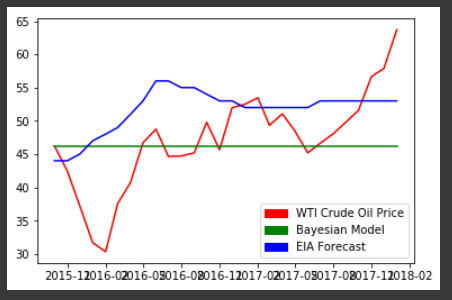


## Step 6

### 6a Time Series Transformation

#### Discretization:
To train our models effectively, it is essential to identify regimes for use in our Belief Network. For this purpose, we utilize Hidden Markov Models (HMMs). HMMs require a discrete state and observation set; therefore, continuous price changes must be discretized into a fixed number of sets. The time series data are transformed into emission sequences by integrating them and substituting the returns with their parity.

#### Train-Validation-Test Set:
In every supervised machine learning task, it is necessary to divide the data into training, validation, and testing sets. The training set is employed to train the model's parameters. The validation set is used to tune the model's hyperparameters, while the testing set is used to evaluate the performance of the trained, hyperparameter-optimized models.

In k-fold cross-validation, the dataset is splitted into k subsets. The model is trained on k-1 subsets and validated on the remaining subset. This process is repeated for all possible combinations, and the validation performances are averaged. This method helps to mitigate the risk of erroneous train-validation splits.

### 6b Learning Parameters

Parameters are learned using the Baum-Welch algorithm. The Baum-Welch algorithm is an Expectation-Maximization algorithm that can be used to find HMM parameters iteratively. Given the sequence of observations, the algorithm iteratively update the parameters to maximize the likelihood of the data (Emilio).

In the hmms library, the step to learn the parameters start with specifying the HMM models. In this case, we initialize 3 hidden states (bull, bear or stagnant) and 2 output variables (increase or decrease). As the hmm library only accepts a list of arrays no greater than 32 in length, we split our data into chunk of size 32.

According to Emilio, the Baum-Welch algorithm consist of 3 steps that can be repeated:


1.   Initialization: start with an initial guess of the parameters
2.   Expectation: compute the expected transitions and emissions given the current parameters
3.   Maximization: update the parameters to maximize the expected likelihood


```
# Initialize our HMM
dhmm_r = hmms.DtHMM.random(3 , 2)

# Split into chunks
e_seq = np.array_split(e_seq, 32)

# Train the model with 100 iterations
 dhmm_r.baum_welch(e_seq, 100)
```

### 6c Finding the most likely sequence of hidden states

The most likely sequence of hidden states is determined using the Viterbi algorithm—a dynamic programming technique specifically designed to identify the most probable sequence of hidden states, referred to as the Viterbi path. A comprehensive discussion of this algorithm is provided in Step 1b.

Following the estimation of Hidden Markov Model (HMM) parameters through the application of the Baum-Welch algorithm in Step 6b, the emission sequence is input into the dhmm_r object to generate the most probable state sequence. This is achieved with the following code:


```
( log_prob, s_seq ) =  dhmm_r.viterbi(np.concatenate(e_seq).ravel())
```
The resulting most probable state sequences are then utilized as inputs to train the Belief Network. This process constructs a Directed Acyclic Graph (DAG) encompassing all variables in the dataset. Consequently, the resulting model is capable of predicting the most probable value of a given variable based on the known values of other variables, thus enhancing the model's predictive capabilities and accuracy.


## STEP 7: MEANING BEHIND THE LATENT STATES

## STEP 9: HILL CLIMB SEARCH:

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.estimators import BicScore
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.models.BayesianNetwork import BayesianNetwork

# Generate (discretised) data with dependencies
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)),
columns=list('ABCDEFGH'));
data['A'] += data['B'] + data['C'];
data['H'] = data['G'] - data['A'];
data['D'] += -data['A'] + data['G'] - data['C']
data_train = data[: int(data.shape[0] * 0.75)];

# Learn network structure
hc = HillClimbSearch(data_train);
dag_model = hc.estimate(scoring_method=BicScore(data_train));
model = BayesianNetwork(dag_model)

# Learn parameters of the network
model.fit(data_train, estimator=BayesianEstimator, prior_type="BDeu");

# Test the dataset
data_test = data[int(0.75 * data.shape[0]) : data.shape[0]];
# Drop variable to be predicted:
data_test.drop('A', axis=1, inplace=True);
# Obtain prediction:
prediction = model.predict(data_test);

  0%|          | 0/1000000 [00:00<?, ?it/s]

<ipython-input-3-ae749dc8dec5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop('A', axis=1, inplace=True);


  0%|          | 0/530 [00:00<?, ?it/s]

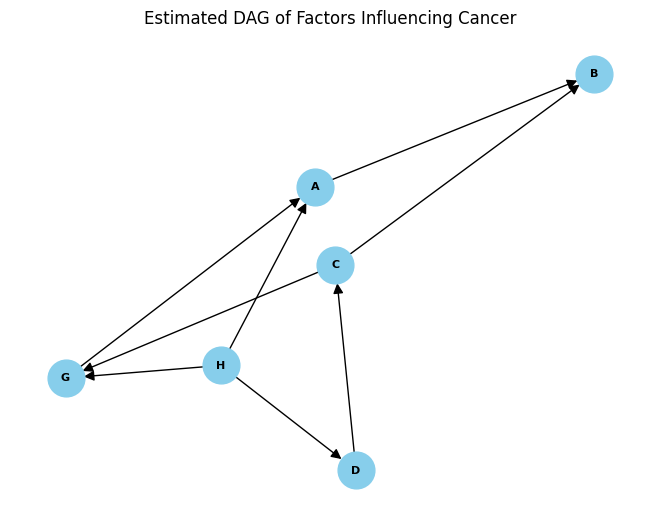

In [ ]:
import networkx as nx
import pylab as plt

edges = model.edges()
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, arrowsize=15)
plt.title("Estimated DAG of Factors Influencing Cancer")
plt.show();

Hill Climb Search is an iterative algorithm that learns the structure of a directed acyclic graph (DAG) by greedily moving towards neighboring solutions, which is associated with higher objective values. This process aims to find the optimal solution in the vicinity of the current state.

We generate a simple example of Hill Climb Search, in which we defined 8 random variables: A, B, to H. The following relationships were specified among these variables:

A = random + B + C

H = G - A

D = random - A + G  - C  ( where -A+G = H)

The model successfully identified all three relationships. Additionally, the model determined that variable E is independent from other attributes.

The result shows that while Hill Climb Search is effective in defining the optimal structure, it might not provide the optimal parameterization of the edges. To estimate the parameters, techniques such as the Maximum Likelihood Estimator, Bayesian Estimator, or Expectation Maximization can be implemented.

## Reference

Butler, Paul. “Intro to the Viterbi Algorithm - Paul Butler - Medium.” Medium, 30 Mar. 2022, frazierbutler.medium.com/intro-to-the-viterbi-algorithm-8f41c3f43cf3.

Degirmenci, Alperen. Introduction to Hidden Markov Models. Harvard University, 2014, https://scholar.harvard.edu/files/adegirmenci/files/hmm_adegirmenci_2014.pdf. Accessed 21 July 2024.

Frazzoli, Emilio. "Lecture 21: Intro to Hidden Markov Models and the Baum-Welch Algorithm." 16.410/413 Principles of Autonomy and Decision Making, Massachusetts Institute of Technology, 24 Nov. 2010, ocw.mit.edu/courses/16-410-principles-of-autonomy-and-decision-making-fall-2010/2ebbc8cc4bc9adc3418a572a17331f63_MIT16_410F10_lec21.pdf. Accessed 22 July 2024.

Jurafsky, Daniel, and James H. Martin. Speech and Language Processing. 3rd ed., draft, Stanford University, https://web.stanford.edu/~jurafsky/slp3/A.pdf. Accessed 21 July 2024.

Torres, Luis. "Viterbi Algorithm Tutorial." McGill University, www.cim.mcgill.ca/~latorres/Viterbi/va_alg.htm. Accessed 20 July 2024.

van Handel, Ramon. Hidden Markov Models: Lecture Notes. Princeton University, 28 July 2008, https://web.math.princeton.edu/~rvan/orf557/hmm080728.pdf. Accessed 21 July 2024.
